# Anisha Mishra

## Task-6: Prediction using Decision Tree Algorithm
For the given ‘Iris’ dataset, create the Decision Tree classifier and visualize it graphically. The purpose is if we feed any new data to this classifier, it would be able to predict the right class accordingly.

In [87]:
# importing necessary libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline



In [88]:
data = pd.read_csv('Iris.csv')
data.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


### Explore the data

In [89]:
data.shape

(150, 6)

In [90]:
data['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [91]:
species = {
    'Iris-setosa': 0,
    'Iris-versicolor':1,
    'Iris-virginica':2
}

In [92]:
data['Species']

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Species, Length: 150, dtype: object

In [93]:
data['Species'].map(species)

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Species, Length: 150, dtype: int64

In [94]:
data['Species'] = data['Species'].map(species)

In [95]:
data.Species.unique()

array([0, 1, 2])

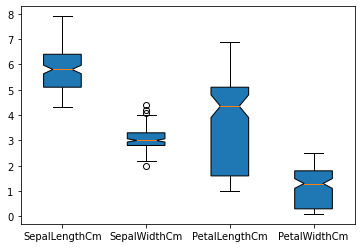

In [31]:
# CHECK FOR OUTLIERS THAT WILL SPOIL THE CLASSIFICATION MODEL USING BOXPLOT

SepalLengthCm = data['SepalLengthCm']
SepalWidthCm = data['SepalWidthCm']
PetalLengthCm = data['PetalLengthCm']
PetalWidthCm = data['PetalWidthCm']

columns = [SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm]

fig,ax = plt.subplots()
ax.boxplot(columns,notch=True,patch_artist=True)
plt.xticks([1,2,3,4],['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm'])
plt.show()

#### OBSERVATION: IT IS EVIDENT THAT THE 'SepalWidthCm' HAS OUTLIERS

In [40]:
# TO REMOVE THE IN 'SepalWidthCm' , USE THE INTER-QUARTILE RANGE TO GET THE MIN AND MAX VALUES OF THE WHISKERS FROM THE BOXPLOT
Q1 = data['SepalWidthCm'].quantile(0.25)
Q3 = data['SepalWidthCm'].quantile(0.75)
IQR = Q3 - Q1

ur = Q3+1.5*IQR
lr = Q1-1.5*IQR

# NOW REMOVE THE VALUES GREATER THAN 'ur' AND LESSER THAN 'lr'
samp = data.index[data['SepalWidthCm'] > ur]
samp.append(data.index[data['SepalWidthCm'] < lr])
data = data.drop(samp)
data.reset_index(drop=True)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...,...
142,146,6.7,3.0,5.2,2.3,2
143,147,6.3,2.5,5.0,1.9,2
144,148,6.5,3.0,5.2,2.0,2
145,149,6.2,3.4,5.4,2.3,2


In [41]:
X = data.iloc[:, 1:5].values
y = data.iloc[:, 5].values
display(X)
display(y)

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [4.9, 3.1, 1.5, 0.1],
       [5. , 3.2, 1.2, 0.2],
       [5.5, 3.5, 1.3, 0.2],
       [4.9, 3

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [46]:
X.shape, y.shape

((147, 4), (147,))

/home/anisha/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


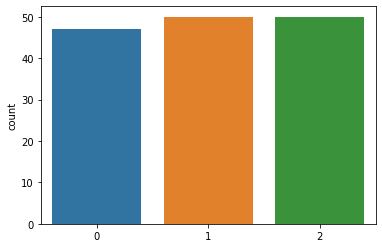

In [47]:
sns.countplot(y)
plt.show()

### Splitting our Data

In [48]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
print(X_train, X_test, y_train, y_test)

[[6.  3.  4.8 1.8]
 [5.3 3.7 1.5 0.2]
 [7.7 2.8 6.7 2. ]
 [5.2 3.4 1.4 0.2]
 [5.  3.6 1.4 0.2]
 [7.4 2.8 6.1 1.9]
 [6.4 2.8 5.6 2.2]
 [6.2 3.4 5.4 2.3]
 [4.8 3.  1.4 0.3]
 [5.1 3.5 1.4 0.3]
 [5.4 3.7 1.5 0.2]
 [7.7 2.6 6.9 2.3]
 [5.6 3.  4.1 1.3]
 [5.8 2.7 5.1 1.9]
 [5.2 2.7 3.9 1.4]
 [5.7 2.9 4.2 1.3]
 [6.8 3.2 5.9 2.3]
 [6.4 2.7 5.3 1.9]
 [5.1 3.5 1.4 0.2]
 [6.8 2.8 4.8 1.4]
 [6.2 2.2 4.5 1.5]
 [4.7 3.2 1.6 0.2]
 [5.  3.5 1.6 0.6]
 [6.1 2.9 4.7 1.4]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [4.8 3.4 1.9 0.2]
 [6.9 3.2 5.7 2.3]
 [6.3 2.3 4.4 1.3]
 [6.7 3.  5.2 2.3]
 [4.6 3.2 1.4 0.2]
 [5.4 3.9 1.3 0.4]
 [6.5 3.  5.8 2.2]
 [4.4 3.2 1.3 0.2]
 [6.1 2.8 4.  1.3]
 [7.7 3.8 6.7 2.2]
 [7.  3.2 4.7 1.4]
 [6.2 2.9 4.3 1.3]
 [5.7 2.5 5.  2. ]
 [5.5 3.5 1.3 0.2]
 [5.5 2.5 4.  1.3]
 [5.8 2.7 5.1 1.9]
 [6.7 3.1 4.4 1.4]
 [7.2 3.  5.8 1.6]
 [5.5 2.4 3.7 1. ]
 [6.3 3.3 4.7 1.6]
 [5.4 3.9 1.7 0.4]
 [6.3 2.7 4.9 1.8]
 [6.3 3.3 6.  2.5]
 [6.9 3.1 4.9 1.5]
 [4.4 3.  1.3 0.2]
 [6.  2.7 5.1 1.6]
 [5.5 2.4 3.

### Building a Decision Tree Classifier

In [49]:
from sklearn.tree import DecisionTreeClassifier

In [50]:
model = DecisionTreeClassifier()
model.fit(X_train ,y_train)

DecisionTreeClassifier()

In [51]:
y_pred = model.predict(X_test)
y_pred

array([2, 1, 2, 0, 2, 0, 1, 0, 1, 0, 0, 1, 2, 2, 2, 1, 0, 1, 2, 0, 0, 2,
       0, 2, 1, 0, 1, 2, 1, 0])

In [52]:
y_test

array([2, 1, 2, 0, 2, 0, 1, 0, 1, 0, 0, 1, 2, 1, 2, 1, 0, 1, 2, 0, 0, 2,
       0, 2, 1, 0, 1, 2, 1, 0])

In [53]:
# IT IS EVIDENT THAT THE MODEL PREDICTS THE CLASS EXTREMELY WELL EVEN IN THE TESTING DATASET
accuracy = accuracy_score(y_test,y_pred)
accuracy*100


96.66666666666667

In [54]:
# COMPARE THE ACTUAL AND PREDICTED VALUES BY CREATING A DATAFRAME
data = {'y_Actual': y_test,
        'y_Predicted': y_pred
        }

df = pd.DataFrame(data)
df.reset_index(inplace = True, drop = True)
df.head()

,y_Actual,y_Predicted
0,2,2
1,1,1
2,2,2
3,0,0
4,2,2


In [55]:
from sklearn import metrics

In [56]:
print("Mean Absolute Error: ", metrics.mean_absolute_error(y_test,y_pred))
print("Mean Squared Error: ", metrics.mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: ", metrics.mean_squared_error(y_test, y_pred)**0.5)
print("R2 Score: ", metrics.r2_score(y_test, y_pred))

Mean Absolute Error:  0.03333333333333333
Mean Squared Error:  0.03333333333333333
Root Mean Squared Error:  0.18257418583505536
R2 Score:  0.9496644295302014


In [57]:
print(f"Precision: {metrics.precision_score(y_test, y_pred, average = 'macro')}")
print(f"Recall: {metrics.recall_score(y_test, y_pred, average = 'macro')}")
print(f"F1 Score: {metrics.f1_score(y_test, y_pred, average = 'macro')}")

Precision: 0.9666666666666667
Recall: 0.9666666666666667
F1 Score: 0.9649122807017544


In [58]:
# CREATE AND VISUALIZE A CONFUSION MATRIX BY USING CROSSTABLE AND HEATMAP
confusion_matrix = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])
print (confusion_matrix)
       


Predicted   0  1  2
Actual             
0          11  0  0
1           0  9  1
2           0  0  9


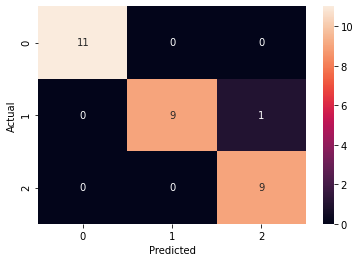

In [59]:
sns.heatmap(confusion_matrix, annot=True)
plt.show()

### Visualizing the Decision Tree

In [98]:
from sklearn import tree

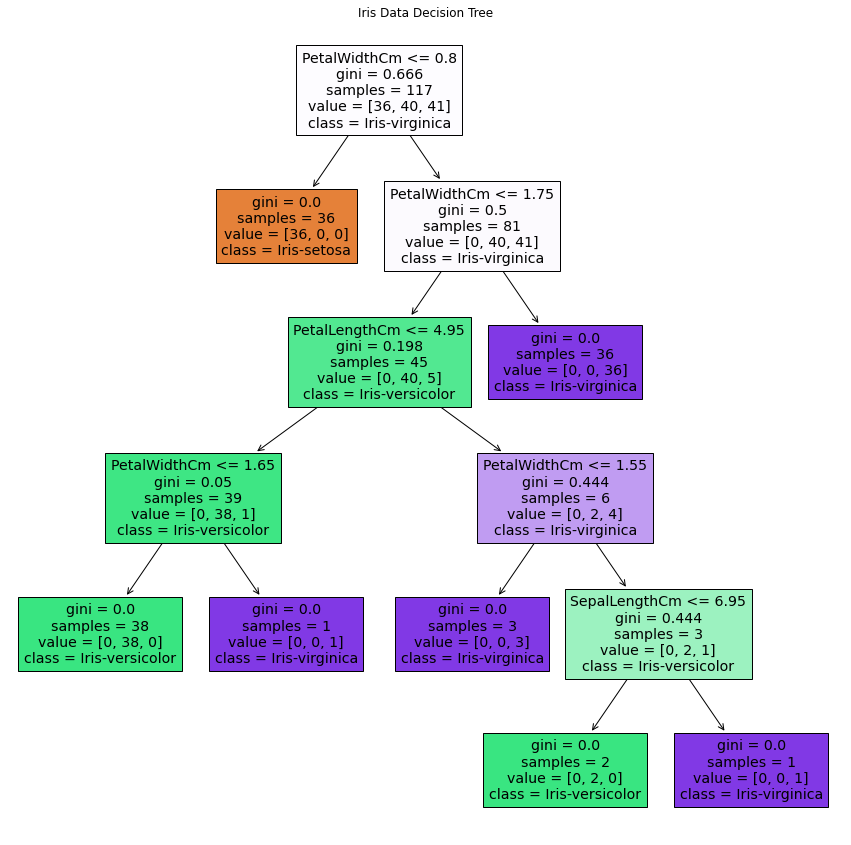

In [105]:
plt.figure(figsize = (15,15))
class_names = ['Iris-setosa','Iris-versicolor','Iris-virginica']
tree.plot_tree(model,
               feature_names = data.iloc[:,1:5].columns.values,class_names=class_names,
               filled = True);
plt.title("Iris Data Decision Tree")
plt.show()



In [101]:
model.predict([[6.1,2.9,4.7,1.4]])

array([1])

### Hence, the Decision Tree Model has been created and visualized with the Accuracy of 96.66% in the Test dataset.
It also predict the class of the given data successfully as 1 which maps to Iris-Veriscolor